In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


breast_cancer = load_breast_cancer()
cancer_data = breast_cancer.data
cancer_target = breast_cancer.target


breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

In [33]:
for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

In [34]:
#sin PCA
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target, train_size=0.8,
                                                    stratify=breast_cancer.target,
                                                    random_state=123)

rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=10, n_jobs=-1)


rnd_clf.fit(X_train,Y_train.ravel())

test_preds = rnd_clf.predict(X_test)
train_preds = rnd_clf.predict(X_train)

from sklearn import metrics

pscore = metrics.accuracy_score(Y_test, test_preds)
pscore_train = metrics.accuracy_score(Y_train, train_preds)


print('test',pscore)
print('train',pscore_train)

test 0.956140350877193
train 0.9802197802197802


In [35]:
scaler = StandardScaler()
cancer_data = scaler.fit_transform(cancer_data)

pca = PCA(n_components = 8)

pca_cancer_data = pca.fit_transform(cancer_data)
cancer_target = cancer_target.reshape(-1,1)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_cancer_data, cancer_target, train_size=0.8,
                                                    stratify=cancer_target,
                                                    random_state=123)

rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=10, n_jobs=-1)

rnd_clf.fit(X_train,Y_train.ravel())

test_preds = rnd_clf.predict(X_test)
train_preds = rnd_clf.predict(X_train)

from sklearn import metrics

pscore = metrics.accuracy_score(Y_test, test_preds)
pscore_train = metrics.accuracy_score(Y_train, train_preds)

print('test',pscore)
print('train',pscore_train)

test 0.9649122807017544
train 0.978021978021978


Text(0, 0.5, 'second principal component')

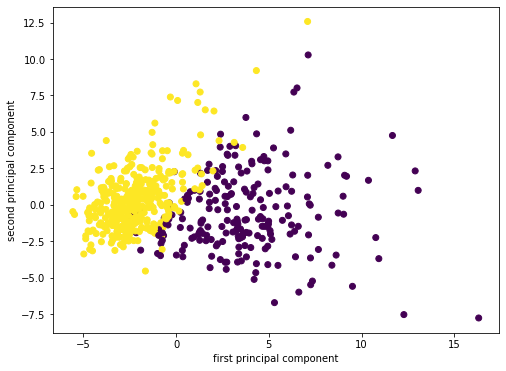

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(pca_cancer_data[:,0],pca_cancer_data[:,1], c=cancer_target[:,0])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

Text(0, 0.5, 'second principal component')

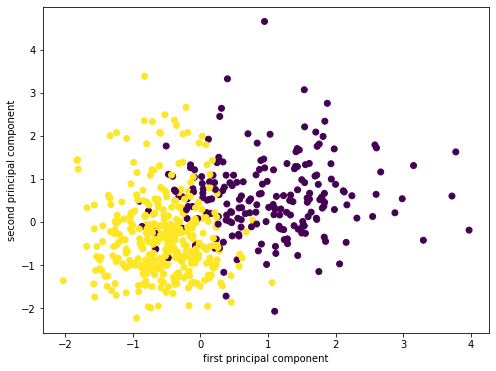

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(cancer_data[:,0],cancer_data[:,1], c=cancer_target[:,0])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724]


Text(0, 0.5, 'Cumulative explained variance')

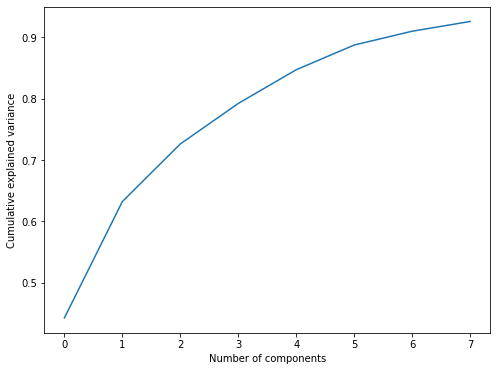

In [10]:
print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')